# TO ADD:
- Nonprofit Executive Incentive Pay (with Erica Harris) *Review of Accounting Studies, December 2018, Volume 23,* Issue 4, pp 1665–1714

# Notes

- The focus is on the hypothesized relationships between concepts. The typical articles examined here includes 1-5 core relationships. Robustness and sensitivity analyses are not included. 
- Few of the studies have core hypotheses that are moderators. In those few cases that do (e.g., Balsam & Harris, 2013), the moderated relationship is noted, but is entered as a direct relationship here for our network purposes. 

# Help, Guides, etc.
https://visjs.github.io/vis-network/examples/network/other/configuration.html

https://visjs.github.io/vis-network/docs/network/edges.html?keywords=arrow

https://visjs.github.io/vis-network/docs/network/nodes.html

https://visjs.github.io/vis-network/examples/network/edgeStyles/smooth.html

# Generate Nodes and Edges for Actor-Network Analysis

In [1]:
cd /Users/gsaxton/Documents/Blog

/Users/gsaxton/Documents/Blog


### Load Packages

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series

In [3]:
import networkx as nx
import itertools

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = (15, 7.5)

In [9]:
import pyvis
print(pyvis.__version__)

0.1.8.2


In [10]:
from pyvis.network import Network

#### Set PANDAS to show all columns in DataFrame

In [11]:
#http://pandas.pydata.org/pandas-docs/stable/options.html
pd.set_option('display.max_columns', None)

In [12]:
pd.set_option('max_colwidth', 150)

#### Read in data

In [13]:
df = pd.read_excel('nonprofit_articles.xlsx')
print('# of columns:', len(df.columns))
print('# of observations:', len(df))
df[:2]

# of columns: 15
# of observations: 28


,Identifier,Author,Title,Journal,Volume,Number,Month,Pages,Year,sample_size,sample_source,Sample notes,unit of analysis,# authors,institutions
0,Zimmerman1976,"Zimmerman, Jerold L.",Budget uncertainty and the allocation decision in a nonprofit organization,Journal of {A}ccounting {R}esearch,14,2,NaN,301--319,1976,NaN,NaN,NaN,NaN,NaN,NaN
1,Chase1994,"Chase, Bruce W.; Coffman, Edward N.",Choice of accounting method by not-for-profit institutions accounting for investments by colleges and universities,Journal of {A}ccounting and {E}conomics,18,2,NaN,233--243,1994,NaN,NaN,NaN,NaN,NaN,NaN


## Networkx

In [14]:
G = nx.DiGraph() ##### I WANT A DIRECTED GRAPH HERE
#G = nx.Graph()

In [15]:
G.clear()

In [16]:
#def add_edge(n1, n2, weight=None):
#    if not G.has_edge(n1,n2):
#        G.add_edge(n1,n2)
#        G[n1][n2]['weight']=1        ###NOTE DIFFERENT WAY OF ACCESSING NODES VS. EDGES
#    else:
#        G[n1][n2]['weight']+=1
 
#def add_node(n1, weight=None):
def add_edge(n1, n2, weight=None): #, weight_node=None):
    if not G.has_node(n1):
        G.add_node(n1)
        G._node[n1]['weight']=1      ###NOTE DIFFERENT WAY OF ACCESSING NODES VS. EDGES
    else:
        G._node[n1]['weight']+=1   
        
    if not G.has_node(n2):
        G.add_node(n2)
        G._node[n2]['weight']=1      ###NOTE DIFFERENT WAY OF ACCESSING NODES VS. EDGES
    else:
        G._node[n2]['weight']+=1          
        
    if not G.has_edge(n1,n2):
        G.add_edge(n1,n2)
        G[n1][n2]['weight']=1        ###NOTE DIFFERENT WAY OF ACCESSING NODES VS. EDGES
    else:
        G[n1][n2]['weight']+=1

#### Zimmerman (1976)
Zimmerman, J. L. (1976). Budget uncertainty and the allocation decision in a nonprofit organization. *Journal of Accounting Research, 14,* 301–319.

In [17]:
#NOTE THAT I AM USING *MY* add_edge* FUNCTION HERE --> OTHERWISE, I WOULD TYPE 'G.add_edge' IN ORDER TO USE THE BUILT-IN FUNCTION
add_edge('Budget Uncertainty', 'Spending Allocation') 
#DV MIGHT ALSO BE CALLED 'OPTIMAL SPENDING ALLOCATION CHOICE/DECISION OR SPENDING ALLOCATION DECISION'
G.edges(data=True)

OutEdgeDataView([('Budget Uncertainty', 'Spending Allocation', {'weight': 1})])

In [18]:
G.nodes(data=True)

NodeDataView({'Budget Uncertainty': {'weight': 1}, 'Spending Allocation': {'weight': 1}})

#### Chase and Coffman (1994)
Chase, B. W., & Coffman, E. N. (1994). Choice of accounting method by not-for-profit institutions accounting for investments by colleges and universities. *Journal of Accounting and Economics, 18,* 233–243.

In [19]:
#NOTE THAT I AM USING *MY* add_edge* FUNCTION HERE --> OTHERWISE, I WOULD TYPE 'G.add_edge' IN ORDER TO USE THE BUILT-IN FUNCTION
add_edge('Institution Type (Public vs. Private College)', 'Investment Accounting Method') 
add_edge('Endowment Size', 'Investment Accounting Method') 
add_edge('Endowment Returns', 'Investment Accounting Method') 
add_edge('Debt Capacity', 'Investment Accounting Method') 

#### Yetman (2001)
Yetman, R. J. (2001). Tax‐motivated expense allocations by nonprofit organizations. *The Accounting Review, 76,* 297–311.

In [20]:
#NOTE THAT I AM USING *MY* add_edge* FUNCTION HERE --> OTHERWISE, I WOULD TYPE 'G.add_edge' IN ORDER TO USE THE BUILT-IN FUNCTION
add_edge('Tax on Unrelated Business Income', 'Spending Allocation') 
#DV MIGHT ALSO BE CALLED 'Expense Allocation Behavior' OR 'Tax-Motivated Expense Allocations' OR 'Income Shifting'

#### Baber, Daniel, & Roberts (2002)
Baber, W. R., Daniel, P. L., & Roberts, A. A. (2002). Compensation to managers of charitable organizations: An empirical study of the role of accounting measures of program activities. *The Accounting Review, 77,* 679–693.

In [21]:
add_edge('Changes in Program Spending', 'Executive Compensation') #Q1
add_edge('Changes in Program Spending Ratio', 'Executive Compensation')#Q2A --> MODERATOR OF Q1  [THE IV IS A DECOMPOSITION OF Q1 IV]
add_edge('Changes in Revenue Received', 'Executive Compensation')#Q2B --> MODERATOR OF Q1 [THE IV IS A DECOMPOSITION OF Q1 IV]
add_edge('Efficiency', 'Executive Compensation')#Q3 --> MODERATOR OF Q2A AND Q2B# IV IS Program Spending Ratio
#AUTHORS REFER TO THE ABOVE IV AS 'PROGRAM SPENDING RATIO CONCERN' --> HYPOTHESES FOCUS ON LOW VS. HIGH RATIO

#### Bolton & Mehran (2006)
Bolton, P., & Mehran, H. (2006). An introduction to the governance and taxation of not-for-profit organizations. *Journal of Accounting and Economics, 41,* 293–305.

In [22]:
add_edge('Income Tax Exemption', 'Misallocation of Resources') #,  color="red")
add_edge('Income Tax Exemption', 'Tax Evasion')#,  color="red")

#### Sansing & Yetman (2006)
Sansing, R., & Yetman, R. (2006). Governing private foundations using the tax law. *Journal of Accounting and Economics, 41,* 363–384.

In [23]:
add_edge('Minimum Distribution Requirement', 'Private Foundation Distributions')
add_edge('Dual Tax Rate Regime', 'Private Foundation Distributions')

##### Core, Guay, & Verdi (2006)
Core, J. E., Guay, W. R., & Verdi, R. S. (2006). Agency problems of excess endowment holdings in not-for-profit firms. *Journal of Accounting and Economics, 41,* 307–333.

In [24]:
#add_edge('Excess Endowment', 'Growth') #,  color="red")
add_edge('Excess Endowment', 'Efficiency')#,  color="red") #PROGRAM EXPENSE RATIO
add_edge('Excess Endowment', 'Executive Compensation')#, color="green")

#### Jones & Roberts (2006)
Jones, C. L., & Roberts, A. A. (2006). Management of financial information in charitable organizations: The case of joint‐cost allocations. *The Accounting Review, 81,* 159–178.

In [25]:
add_edge('Joint Cost Allocations', 'Program Expense Ratio Management')
#add_edge('minimum distribution requirement', '')

#### Krishnan, Yetman, & Yetman (2006)
Krishnan R., Yetman M.H., & Yetman, R. J. (2006). Expense misreporting in nonprofit organizations. *The Accounting Review, 81,* 399–420.

In [26]:
#IV is (Compensation Sensitivity and Donations Sensitivity)
add_edge('Managerial Incentives', 'Expense Misreporting')
#add_edge('minimum distribution requirement', '')

#### Keating, Parsons, & Roberts (2008)
Keating, E. K., Parsons, L. M., & Roberts, A. A. (2008). Misreporting fundraising: How do nonprofit organizations account for telemarketing campaigns? *The Accounting Review, 83,* 417–446.

In [27]:
#DV FOR ALL TESTS IS *Telemarketing Expense Mis-Reporting*
add_edge('Professionalism', 'Expense Misreporting') #IV IS (Size, Paid Management)
add_edge('Accounting Sophistication', 'Expense Misreporting') #IV IS  (Accrual Accounting, External Accounting Services, Restricted Donations)
add_edge('External Monitoring', 'Expense Misreporting') #IV IS (501c3 Status, Independent Audit)
add_edge('Financial Incentives', 'Expense Misreporting') #IV IS (Leverage, Yield)

#### Petrovits, Shakespeare, & Shih (2011)
Petrovits, C., Shakespeare, C., & Shih, A. (2011). The causes and consequences of internal control problems in nonprofit organizations. *The Accounting Review, 86,* 325–357.

In [28]:
add_edge('Complexity', 'Internal Control Deficiencies')
add_edge('Financial Health', 'Internal Control Deficiencies')
add_edge('Size', 'Internal Control Deficiencies')
add_edge('Newness of Federal Funding', 'Internal Control Deficiencies')
add_edge('Growth', 'Internal Control Deficiencies')
add_edge('Internal Control Deficiencies', 'Public Support')
add_edge('Internal Control Deficiencies', 'Government Contributions')

#### Eldenburg, Gunny, Hee, & Soderstrom (2011).
Eldenburg, L. G., Gunny, K. A., Hee, K. W., & Soderstrom, N. (2011). Earnings management using real activities: Evidence from nonprofit hospitals. *The Accounting Review, 86,* 1605–1630.

In [29]:
add_edge('Accounting Performance (Below/Above Benchmark)', 'Earnings Management')
add_edge('Pay-for-Performance Incentives', 'Earnings Management')

#### Krishnan & Yetman (2011)
Krishnan, R., & Yetman, M. H. (2011). Institutional drivers of reporting decisions in nonprofit hospitals. *Journal of Accounting Research, 49,* 1001–1039.mm

# 'Cost shifting' is 'cost management', analogous to 'earnings management'

In [30]:
add_edge('Normative Institutional Pressure', 'Cost Shifting')
add_edge('Regulative Institutional Pressure (Oversight)', 'Cost Shifting')
add_edge('Donations Reliance', 'Cost Shifting')

##### Aggarwal et al. (2012)
board size, managerial incentives and enterprise performance

Aggarwal, R. K., Evans, M. E., & Nanda, D. (2012). Nonprofit boards: Size, performance and managerial incentives. *Journal of Accounting and Economics, 53,* 466–487.

In [31]:
#NOTE THAT I AM USING *MY* add_edge* FUNCTION HERE --> OTHERWISE, I WOULD TYPE 'G.add_edge' IN ORDER TO USE THE BUILT-IN FUNCTION
add_edge('Board Size', 'Managerial Incentives') #,  color="red")
add_edge('Board Size', 'Financial Performance')#,  color="red")
add_edge('# of Programs', 'Board Size')#, color="green")

#### Yetman & Yetman (2012)
Yetman, M. H., & Yetman, R. J. (2012). Do donors discount low-quality accounting information? *The Accounting Review, 88,* 1041–1067.

In [32]:
add_edge('Low-Quality Program Ratio', 'Donations')
add_edge('Financial Data Availability', 'Donations')
add_edge('Donor Sophistication', 'Donations')

#### Yetman & Yetman (2012)
Yetman, M. H., & Yetman, R. J. (2012). How does the incentive effect of the charitable deduction vary across charities? *The Accounting Review, 88,* 1069–1094.

In [33]:
add_edge('Tax Incentives', 'Donations')

#### Yetman & Yetman (2012)
Yetman, M. H., & Yetman, R. J. (2012). The effects of governance on the accuracy of charitable expenses reported by nonprofit organizations. *Contemporary Accounting Research, 29,* 738–767.

In [34]:
#GOVERNANCE IS THE INDEPENDENT VARIABLE BUT WE SHOULD PROBABLY CONSIDER IT AN UMBRELLA CATEGORY
#THUS, BELOW I ADD FIVE EDGES (WITH MEASURES IN PARENTHESES)
#GOOD EXAMPLE OF STUDY THAT HAS MULTIPLE MEASURES OF A CONSTRUCT
#add_edge('Governance', 'Charitable Expense Accouracy/Expense Reporting Accuracy (Financial Reporting Quality, Financial Reporting Accuracy) -- \
#          Zero-Reported FR Exp, Understated FR Exp, Zero Admin Exp, Understated Admin Exp')

#IV IS Distance Separating Collective Ownership/Separation between Collective Ownership and Control; DV IS Expense Reporting Accuracy
add_edge('Outsourced Management', 'Financial Reporting Quality') 
#IV IS (Independent Directors, Voting Directors, IRS 990 Review, Audit Committee); DV IS Expense Reporting Accuracy
add_edge('Board of Director Monitoring', 'Financial Reporting Quality') 
#IV IS (Standard Audit, A-133 Audit, Big 5 CPA, Medium CPA, Small CPA); DV IS Expense Reporting Accuracy
add_edge('Audit Quality', 'Financial Reporting Quality') 
#IV IS (Donor Restrictions, Municipal Bonds); DV IS Expense Reporting Accuracy
add_edge('Capital Provider Monitoring', 'Financial Reporting Quality') 
#IV IS (Taxable Revenue, State Regulation, State Enforcement, Written COI, Whistleblower, and Document Retention Policies); DV IS Expense Reporting Accuracy
add_edge('External and Internal Regulatory Oversight', 'Financial Reporting Quality') 

#### Balsam & Harris (2013)
Balsam, S., & Harris, E. E. (2013). The Impact of CEO Compensation on Nonprofit Donations. *The Accounting Review, 89,* 425–450.

In [35]:
#CORE RELATIONSHIP EXAMINED (TECHNICALLY, THE AUTHORS LOOK AT EXECUTIVE COMPENSATION *DISCLOSURE* IN 990 AND MEDIA)
add_edge('Executive Compensation', 'Donations')  
add_edge('Donor Sophistication', 'Donations') #TECHNICALLY, THIS IS A *MODERATOR*
add_edge('Nonprofit Orientation (Service-Oriented vs. Charitable)', 'Donations') #TECHNICALLY, THIS IS A *MODERATOR*
add_edge('Executive Compensation', 'Government Grants')
add_edge('Executive Compensation', 'Program Service Revenues')

#### Harris, Petrovits, & Yetman (2014)
Harris, E., Petrovits, C. M., & Yetman, M. H. (2014). The effect of nonprofit governance on donations: Evidence from the revised Form 990. *The Accounting Review, 90,* 579–610.

In [36]:
#WE COULD ARGUABLY SIMPLY REFER TO THIS AS A *SINGLE* CONSTRUCT CALLED 'GOVERNANCE FACTORS'
#add_edge('Governance Factors', 'Donations')
add_edge('Governance (Formal Written Policies)', 'Donations') #Policies
add_edge('Governance (Independent Audit and Audit Committee)', 'Donations') #Audit
add_edge('Governance (Executive Compensation Review and Approval Policies)', 'Donations')
add_edge('Governance (Board Oversight)', 'Donations') #Board Size and Independence
add_edge('Governance (Board Management Weaknesses)', 'Donations') #No Related-Party Transactions, No Outsourcing of Management, Accessibility, Form 990 Updates
add_edge('Governance (Accessibility of Financial Information)', 'Donations')
add_edge('Governance (Documentation of Board and Committee Meetings)', 'Donations') #Minutes

#### Vermeer, Edmonds, & Asthana (2014)
Vermeer, T. E., Edmonds, C. T., & Asthana, S. C. (2014). Organizational form and accounting choice: are nonprofit or for-profit managers more aggressive? *The Accounting Review, 89,* 1867–1893.

In [37]:
add_edge('Earnings', 'Earnings Management') #(Income-Decreasing Actuarial Assumptions)
add_edge('Leverage', 'Earnings Management') #(Income-Increasing Actuarial Assumptions)
add_edge('Pension Plan Funding Level', 'Earnings Management') # (Income-Increasing Actuarial Assumptions)
add_edge('External Auditor Oversight', 'Earnings Management') # (Income-Increasing Actuarial Assumptions)
add_edge('Organizational Type (Nonprofit vs. For-Profit)', 'Earnings Management') #(Aggressive Actuarial Assumptions)

#### Dhole, Khumawala, Mishra, & Ranasinghe (2014)
Dhole, S., Khumawala, S. B., Mishra, S., & Ranasinghe, T. (2014). Executive compensation and regulation-imposed governance: Evidence from the California Nonprofit Integrity Act of 2004. *The Accounting Review, 90,* 443–466.

In [38]:
#CALL THIS IV '(NEW) REGULATION'
add_edge('California Nonprofit Integrity Act', 'Executive Compensation')

#### Eldenburg, Gaertner & Goodman (2015)
Eldenburg, L. G., Gaertner, F. B., & Goodman, T. H. (2015). The influence of ownership and compensation practices on charitable activities. *Contemporary Accounting Research, 32,* 169–192.

In [39]:
#STUDY OF NONPROFIT HOSPITALS
# * P4P Sensitivities* DEFINED AS "the sensitivity of hospital manager compensation to net income" OR "sensitivity of changes in the pay of hospital managers to the changes in hospital income."
# *Charity Care* DEFINED AS "unreimbursed charges related to charity care/gross patient charges." IT IS A "discretionary expenditure that is controllable by managers"
# "We measure Charity Care as the unreimbursed revenue related to charitable activities (i.e., charges for patient treatment that is classified as charity care) scaled by gross revenue (gross patient charges). Our"
# CHARITY CARE IS "patient care that is provided free or at reduced prices"
add_edge('Pay-for-Performance Sensitivities', 'Charity Care') #THIS HYPOTHESIS (H1) IS TESTED IN *FOR-PROFIT* HOSPITALS
add_edge('Organization Type (Nonprofit vs. For-Profit)', 'Charity Care') #ORGANIZATION TYPE (NONPROFIT AS OPPOSED TO FOR-PROFIT) IS A MODERATOR OF H1

#### Neuman, Omer, & Thompson (2015)
Neuman, S. S., Omer, T. C., & Thompson, A. M. (2015). Determinants and consequences of tax service provider choice in the not‐for‐profit sector. *Contemporary Accounting Research, 32,* 703–735.

In [40]:
#THE CONSEQUENCE STUDIED IS NOT 'EXECUTIVE COMPENSATION' (I.E., THE AMOUNT) BUT RATHER WHETHER THE COMPENSATION HAS BEEN MISREPORTED
#THIS STUDY VARIES THE 'BASELINE' CATEGORY IN ALMOST EVERY TEST
add_edge('Geographical Proximity of Tax Providers', 'Tax Service Provider Choice') # (Auditor-provided vs. Other CPA, Law/Tax Consulting Firm, or Self Preparation)')
add_edge('Local Availability of Professional Tax Knowledge', 'Tax Service Provider Choice')
add_edge('Tax Service Provider Choice', 'Executive Compensation Misreporting') #(Non-Auditor and Self-Prepare vs. Auditor-Provided), #Reporting Quality (Quality of Executive Compensation Disclosure -- "MISREPORT")')
add_edge('Tax Service Provider Choice', 'Donations') #(Self Preparation vs. Professional Preparation)

# N.B. - Chen (2016) and Vansant (2016) both have very 'complex' hypothesis structures. Both also have one *FT 50* accounting publication -- and in fact, each has only one *FT 50* publication in any field. 

#### Chen (2016)
Chen, Q. (2016). Director monitoring of expense misreporting in nonprofit organizations: The effects of expense disclosure transparency, donor evaluation focus and organization performance. *Contemporary Accounting Research, 33,* 1601–1624.

In [41]:
#DV IS Director Monitoring (to Curb Management Expense Misallocation)'
add_edge('Transparency of Expense Reporting Disclosures', 'Director Monitoring') #increase monitoring by "being less likely to permit management to misallocate expenses to enhance a low program ratio"
add_edge('Donor Evaluation Focus (Financially-Focused vs. Balanced)', 'Director Monitoring') #H2A/H2B --> THIS IS A MODERATED RELATIONSHIP #increase monitoring by "being less likely to permit management to misallocate expenses to enhance a low program ratio"
add_edge('Non-Financial Performance', 'Director Monitoring') # H2A/H2B --> THIS IS A MODERATED RELATIONSHIP
#THE 3 MANIULATED/INDEPENDENT VARIABLES ARE "the transparency of the organization’s expense disclosures (TR), donor evaluation focus (EF), and the organization’s nonfinancial performance (NFP)—are independent variables. The"
#when they perceive donors to have adopted a balanced evaluation focus than when they perceive donors to have adopted a financially focused
#transparency of expense disclosures, donor evaluation focus, and organization performance—influence how directors monitor management expense misreporting in nonprofit organizations

#### Vansant (2016)
Vansant, B. (2016). Institutional pressures to provide social benefits and the earnings management behavior of nonprofits: Evidence from the U.S. hospital industry. *Contemporary Accounting Research, 33,* 1576–1600.

In [42]:
#PROBABLY CHANGE THIS DV TO 'EARNINGS MANAGEMENT'
#institutional pressures to provide social benefits and the discretionary accrual behavior (Income-Decreasing or Income-Increasing Earnings Management)
#THIS PAPER HAS A COMPLEX THEORETICAL STRUCTURE
#DV IS Discretionary Accruals
add_edge('Premanaged Earnings', 'Earnings Management') #H1 --> H1 AND H2 ARE COLLECTIVELY MODERATED
add_edge('Charity Care', 'Earnings Management')  #H2 --> H1 AND H2 ARE COLLECTIVELY MODERATED
#add_edge('Charity Care (Exceeding Normative Expectations)', 'Earnings Management (Discretionary Accruals)') #H3 --> SPECIFICATION OF CORE IV --> DV RELATIONSHIP
#I HAVE COMMENTED OUT H3 -- IT'S JUST A FURTHER SPECIFICATION OF THE CORE RELATIONSHIP

#### Harris & Neely (2016)
Harris, E. E., & Neely, D. G. (2016). Multiple information signals in the market for charitable donations. *Contemporary Accounting Research, 33,* 989–1012.

In [43]:
#SOME OF THESE HYPOTHESES COULD POTENTIALLY BE COMBINED (ESPECIALLY H1 AND H2)
add_edge('Existence of Third-Party Ratings', 'Donations')  #BBB, AIP, or Charity Navigator
add_edge('Number of Third-Party Ratings', 'Donations')  #BBB, AIP, and Charity Navigator
add_edge('Non-Neutral Third-Party Ratings', 'Donations') #Good or Bad rating
add_edge('Consistent Third-Party Ratings', 'Donations')  #Across BBB, AIP, and Charity Navigator

#### Fitzgerald, Omer & Thompson (2018)
Fitzgerald, B. C., Omer, T. C., & Thompson, A. M. (2018). Audit partner tenure and internal control reporting quality: U.S. evidence from the not‐for‐profit sector. *Contemporary Accounting Research, 35,* 334–364.

In [44]:
#THIS IS AN EXAMPLE OF A PAPER WHERE YOU CAN GUESS THE IV AND DV FROM THE TITLE
#the incidence of reported internal control deficiencies (ICDs), the quality of internal con- trol reports (following PCAOB audit quality indicators), and the severity of reported ICDs.
add_edge('Audit Partner Tenure', 'Internal Control Report Quality')  #H1
add_edge('Audit Partner Changes', 'Internal Control Report Quality') #H2
add_edge('Audit Partner Tenure', 'Severity of Reported Internal Control Deficiencies')  #H1
add_edge('Audit Partner Changes', 'Severity of Reported Internal Control Deficiencies') #H2

#### Balsam & Harris (2018)
Balsam, S., & Harris, E. E. (2018). Nonprofit executive incentive pay. *Review of Accounting Studies, 23,* 1665–1714.

- "Bonuses are common in nonprofits, as we observe that approximately 45% of the 44,000 organization-year observations in our sample reported paying CEO bonuses. We find that the bonuses are positively associated with profitability, competition from other nonprofits, firm size, available cash, and use of compensation consultants and committees, while negatively related to board oversight, donations, and grants. Our results also suggest that donors look unfavorably at the payment of bonuses; that is, bonuses are associated with lower future donations."

In [45]:
add_edge('Profitability', 'Bonus Pay') #H1
add_edge('Efficiency', 'Bonus Pay')  #H2 -- 'Performance Measures Other than Profitability' (Efficiency)
add_edge('Revenue Generation', 'Bonus Pay')  #H2 -- 'Performance Measures Other than Profitability' (Revenue Generation -- Donations, Gov't Grants, Prog Svce Rev.)
add_edge('Competition', 'Bonus Pay')  #H3 -- Competition the nonprofit faces from other nonprofit organizations
add_edge('Bonus Pay', 'Donations')  #H4
add_edge('Bonus Pay', 'Profitability')  #H5
G.edges(data=True)

OutEdgeDataView([('Budget Uncertainty', 'Spending Allocation', {'weight': 1}), ('Institution Type (Public vs. Private College)', 'Investment Accounting Method', {'weight': 1}), ('Endowment Size', 'Investment Accounting Method', {'weight': 1}), ('Endowment Returns', 'Investment Accounting Method', {'weight': 1}), ('Debt Capacity', 'Investment Accounting Method', {'weight': 1}), ('Tax on Unrelated Business Income', 'Spending Allocation', {'weight': 1}), ('Changes in Program Spending', 'Executive Compensation', {'weight': 1}), ('Executive Compensation', 'Donations', {'weight': 1}), ('Executive Compensation', 'Government Grants', {'weight': 1}), ('Executive Compensation', 'Program Service Revenues', {'weight': 1}), ('Changes in Program Spending Ratio', 'Executive Compensation', {'weight': 1}), ('Changes in Revenue Received', 'Executive Compensation', {'weight': 1}), ('Efficiency', 'Executive Compensation', {'weight': 1}), ('Efficiency', 'Bonus Pay', {'weight': 1}), ('Income Tax Exemption',

In [46]:
G.edges(data=True)

OutEdgeDataView([('Budget Uncertainty', 'Spending Allocation', {'weight': 1}), ('Institution Type (Public vs. Private College)', 'Investment Accounting Method', {'weight': 1}), ('Endowment Size', 'Investment Accounting Method', {'weight': 1}), ('Endowment Returns', 'Investment Accounting Method', {'weight': 1}), ('Debt Capacity', 'Investment Accounting Method', {'weight': 1}), ('Tax on Unrelated Business Income', 'Spending Allocation', {'weight': 1}), ('Changes in Program Spending', 'Executive Compensation', {'weight': 1}), ('Executive Compensation', 'Donations', {'weight': 1}), ('Executive Compensation', 'Government Grants', {'weight': 1}), ('Executive Compensation', 'Program Service Revenues', {'weight': 1}), ('Changes in Program Spending Ratio', 'Executive Compensation', {'weight': 1}), ('Changes in Revenue Received', 'Executive Compensation', {'weight': 1}), ('Efficiency', 'Executive Compensation', {'weight': 1}), ('Efficiency', 'Bonus Pay', {'weight': 1}), ('Income Tax Exemption',

### Inspect Nodes

In [47]:
for edge in G.nodes(data=True):
    print(edge)

('Budget Uncertainty', {'weight': 1})
('Spending Allocation', {'weight': 2})
('Institution Type (Public vs. Private College)', {'weight': 1})
('Investment Accounting Method', {'weight': 4})
('Endowment Size', {'weight': 1})
('Endowment Returns', {'weight': 1})
('Debt Capacity', {'weight': 1})
('Tax on Unrelated Business Income', {'weight': 1})
('Changes in Program Spending', {'weight': 1})
('Executive Compensation', {'weight': 9})
('Changes in Program Spending Ratio', {'weight': 1})
('Changes in Revenue Received', {'weight': 1})
('Efficiency', {'weight': 3})
('Income Tax Exemption', {'weight': 2})
('Misallocation of Resources', {'weight': 1})
('Tax Evasion', {'weight': 1})
('Minimum Distribution Requirement', {'weight': 1})
('Private Foundation Distributions', {'weight': 2})
('Dual Tax Rate Regime', {'weight': 1})
('Excess Endowment', {'weight': 2})
('Joint Cost Allocations', {'weight': 1})
('Program Expense Ratio Management', {'weight': 1})
('Managerial Incentives', {'weight': 2})
('E

### Inspect Edges

In [48]:
for edge in G.edges(data=True):
    print(edge)

('Budget Uncertainty', 'Spending Allocation', {'weight': 1})
('Institution Type (Public vs. Private College)', 'Investment Accounting Method', {'weight': 1})
('Endowment Size', 'Investment Accounting Method', {'weight': 1})
('Endowment Returns', 'Investment Accounting Method', {'weight': 1})
('Debt Capacity', 'Investment Accounting Method', {'weight': 1})
('Tax on Unrelated Business Income', 'Spending Allocation', {'weight': 1})
('Changes in Program Spending', 'Executive Compensation', {'weight': 1})
('Executive Compensation', 'Donations', {'weight': 1})
('Executive Compensation', 'Government Grants', {'weight': 1})
('Executive Compensation', 'Program Service Revenues', {'weight': 1})
('Changes in Program Spending Ratio', 'Executive Compensation', {'weight': 1})
('Changes in Revenue Received', 'Executive Compensation', {'weight': 1})
('Efficiency', 'Executive Compensation', {'weight': 1})
('Efficiency', 'Bonus Pay', {'weight': 1})
('Income Tax Exemption', 'Misallocation of Resources', 

In [49]:
nx.write_weighted_edgelist(G, "test.weighted.edgelist", delimiter=';')

In [51]:
pwd

'/Users/gsaxton/Documents/Blog'

In [50]:
#from pyvis.network import Network 
#import pandas as pd
got_net = Network(
   height="750px",
   width="1500px",
   #bgcolor="#222222",
   #font_color="white", 
   notebook=True,
   directed=True,
)


# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("test.weighted.edgelist", header=None, delimiter=";")
sources = got_data[0]
targets = got_data[1]
weights = got_data[2]
edge_data = zip(sources, targets, weights)
for e in edge_data: 
    src = e[0]
    dst = e[1]
    #w = math.ceil(e[2]/10)
    w = e[2]#*e[2]
    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    
    #SEE https://github.com/WestHealth/pyvis/issues/20
    got_net.add_edge(src, dst, width=w)     #NOTE: USE 'WIDTH' HERE INSTEAD OF 'VALUE' (VALUE WILL MAKE VERY THICK LINES)
neighbor_map = got_net.get_adj_list()


# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + \
           "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])
     
#    "smooth": {
#      "type": "discrete",
#      "forceDirection": "none"
#    },
        
got_net.set_options("""
var options = {
    "smooth": {
      "type": "straightCross",
      "forceDirection": "none",
      "roundness": 0.1      
    },
  "interaction": {
    "navigationButtons": true
  },    
  "physics": {
    "enabled": true,
    "forceAtlas2Based": {
      "springLength": 25
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
    }
    }
    """)
     
got_net.show('new.html')

# Inspect Network

In [46]:
G.nodes(data=True)

NodeDataView({'Budget Uncertainty': {}, 'Spending Allocation': {}, 'Institution Type (Public or Private)': {}, 'Investment Accounting Method': {}, 'Endowment Size': {}, 'Endowment Returns': {}, 'Debt Capacity': {}, 'Inveastment Accounting Method': {}, 'Tax on Unrelated Business Income': {}, 'Changes in Program Spending': {}, 'Executive/Managerial Compensation': {}, 'Changes in Program Efficiency Ratio': {}, 'Changes in Revenue Received': {}, 'Program Spending Ratio Concern': {}, 'Income Tax Exemption': {}, 'Misallocation of Resources': {}, 'Tax Evasion': {}, 'Minimum Distribution Requirement': {}, 'Private Foundation Distributions': {}, 'Dual Tax Rate Regime': {}, 'Excess Endowment': {}, 'Organizational Efficiency': {}, 'Executive Compensation': {}, 'Joint Cost Allocations': {}, 'Program Expense Ratio Management': {}, 'Managerial Incentives (Compensation Sensitivity and Donations Sensitivity)': {}, 'Expense Misreporting': {}, 'Board Size': {}, 'Managerial Incentives': {}, 'Financial Pe

In [47]:
G.edges(data=True)

OutEdgeDataView([('Budget Uncertainty', 'Spending Allocation', {'weight': 1}), ('Institution Type (Public or Private)', 'Investment Accounting Method', {'weight': 1}), ('Endowment Size', 'Investment Accounting Method', {'weight': 1}), ('Endowment Returns', 'Investment Accounting Method', {'weight': 1}), ('Debt Capacity', 'Inveastment Accounting Method', {'weight': 1}), ('Tax on Unrelated Business Income', 'Spending Allocation', {'weight': 1}), ('Changes in Program Spending', 'Executive/Managerial Compensation', {'weight': 1}), ('Changes in Program Efficiency Ratio', 'Executive/Managerial Compensation', {'weight': 1}), ('Changes in Revenue Received', 'Executive/Managerial Compensation', {'weight': 1}), ('Program Spending Ratio Concern', 'Executive/Managerial Compensation', {'weight': 1}), ('Income Tax Exemption', 'Misallocation of Resources', {'weight': 1}), ('Income Tax Exemption', 'Tax Evasion', {'weight': 1}), ('Minimum Distribution Requirement', 'Private Foundation Distributions', {

In [48]:
G['Board Size']

AtlasView({'Managerial Incentives': {'weight': 1}, 'Financial Performance': {'weight': 1}})

### Draw Graph

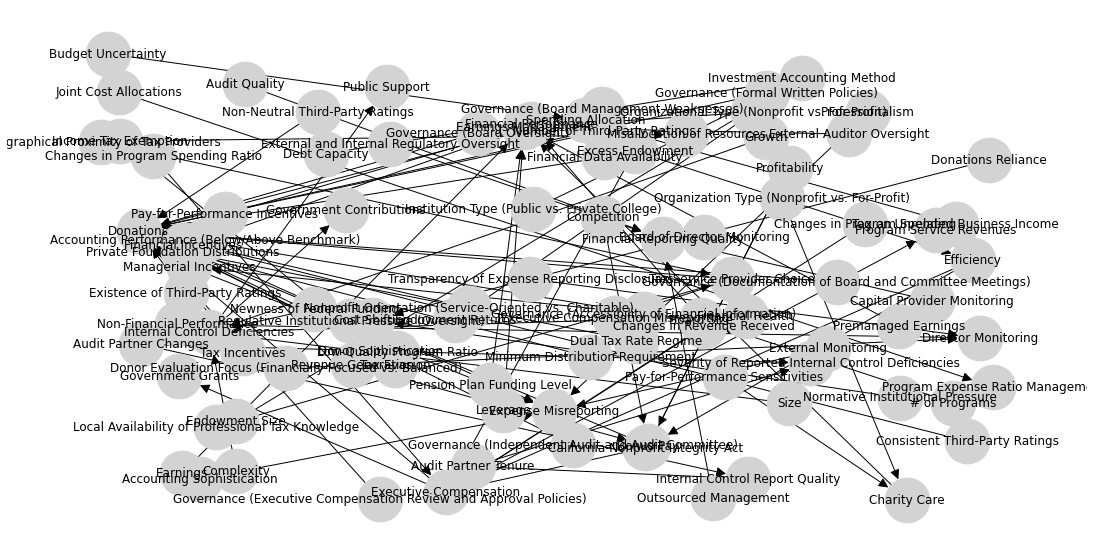

In [291]:
options = {
    'node_color': 'lightgrey',
    'node_size': 2000,
    'width': 1,
    #'arrowstyle': '-|>',
    'arrowsize': 20,
    #'font_weight': 'bold',
}
nx.draw_random(G, with_labels=True, **options)  #arrows=True, 

### Export

In [87]:
pwd

'/Users/gsaxton/Dropbox/ipython_notebooks'

In [121]:
cd /Users/gsaxton/Dropbox/ipython_notebooks

/Users/gsaxton/Dropbox/ipython_notebooks


In [97]:
nx.write_edgelist(G, "test.edgelist")
nx.write_graphml(G, "test.graphml")
nx.write_gml(G, "test.gml")
nx.write_weighted_edgelist(G, "test.weighted.edgelist", delimiter=';')

#### With *show_buttons*

In [73]:
from pyvis.network import Network
import networkx as nx

nt = Network("500px", "1000px",  notebook=True, directed=True,)

#nt.enable_physics(True)
#Network.enable_physics(False)
#nxg = G#nx.davis_southern_women_graph()
nt.barnes_hut()
nt.from_nx(G)

nt.show_buttons(filter_=['physics'])
#BELOW I COPIED THE OUTPUT FROM 'GENERATE OPTIONS' AND PASTED IT IN set_options
#"You can copy/paste the output from the generate options button in the above UI into network.Network.set_options() 
#to finalize your results from experimentation with the settings."
#https://pyvis.readthedocs.io/en/latest/tutorial.html
#nt.set_options("""
#  "physics": {
#    "enabled": false,
#    "forceAtlas2Based": {
#      "springLength": 100
#    },
#    "minVelocity": 0.75,
#    "solver": "forceAtlas2Based"}
#    """)

nt.show("text.html")

#### With *set_options*

In [74]:
from pyvis.network import Network
import networkx as nx

nt = Network("500px", "1000px",  notebook=True, directed=True)

#nt.enable_physics(True)
#Network.enable_physics(False)
#nxg = G#nx.davis_southern_women_graph()
nt.barnes_hut()
nt.from_nx(G)

#nt.show_buttons(filter_=['physics'])
#BELOW I COPIED THE OUTPUT FROM 'GENERATE OPTIONS' AND PASTED IT IN set_options
#"You can copy/paste the output from the generate options button in the above UI into network.Network.set_options() 
#to finalize your results from experimentation with the settings."
#https://pyvis.readthedocs.io/en/latest/tutorial.html
nt.set_options("""
  "physics": {
    "enabled": false,
    "forceAtlas2Based": {
      "springLength": 100
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"}
    """)

nt.show("text.html")

#### Reading in edgelist

In [67]:
cd /Users/gsaxton/Dropbox/ipython_notebooks

/Users/gsaxton/Dropbox/ipython_notebooks


For examples, and to play around with settings and generate options, see here: https://visjs.github.io/vis-network/examples/network/edgeStyles/smooth.html

In [122]:
nx.write_weighted_edgelist(G, "test.weighted.edgelist", delimiter=';')

In [123]:
#from pyvis.network import Network 
#import pandas as pd
got_net = Network(
   height="500px",
   width="1000px",
   #bgcolor="#222222",
   #font_color="white", 
   notebook=True,
   directed=True,
)


# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("test.weighted.edgelist", header=None, delimiter=";")
sources = got_data[0]
targets = got_data[1]
weights = got_data[2]
edge_data = zip(sources, targets, weights)
for e in edge_data: 
    src = e[0]
    dst = e[1]
    #w = math.ceil(e[2]/10)
    w = e[2]/10
    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    
    #SEE https://github.com/WestHealth/pyvis/issues/20
    got_net.add_edge(src, dst, width=w)     #NOTE: USE 'WIDTH' HERE INSTEAD OF 'VALUE' (VALUE WILL MAKE VERY THICK LINES)
neighbor_map = got_net.get_adj_list()


# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + \
           "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])
     
#    "smooth": {
#      "type": "discrete",
#      "forceDirection": "none"
#    },
        
got_net.set_options("""
var options = {
    "smooth": {
      "type": "straightCross",
      "forceDirection": "none",
      "roundness": 0.1      
    },
  "interaction": {
    "navigationButtons": true
  },    
  "physics": {
    "enabled": true,
    "forceAtlas2Based": {
      "springLength": 25
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
    }
    }
    """)
     
got_net.show('new.html')

# The above is a useful exercise -- what is 'accounting' research is to a large extent what accounting academics *think* (agree) is accounting research!

In [18]:
G.edges

NameError: name 'G' is not defined

In [69]:
pwd

'/Users/gsaxton/Documents/Blog'

In [68]:
nx.write_gml(G, "Nonprofit Articles.gml")